## Introduction
----

There are various versions of KNN Classifier but here we only talk about simple version of KNN classifier that is to predict the target label by finding the nearest neighbour class. The closest class will be identified using the Distance measure by Euclidean Distance

### KNN Pseudocode

- Let K as the desired number of nearest neighbours, and Z is containg p1, p2, p3………… pn are training samples. p1 = (xi,ci) where xi is feature vector of p1 and ci is class of p1
- For each train points:
    - Compute  “d(x, xi)” i =1, 2, ….., n; for all pi where d denotes the Euclidean distance between the points.
    - Sort all the points pi in terms of d(x, xi)
    - Select the first K points from the sorted list.
    - Find the corresponding Class Ci  - against K distances.
    - Assign a class to test data t based on majority vote:- argmax(C1,C2…Ck)

### Understanding Pseudocode

Firstly dataset is loaded into python pandas and stored in dataframe. When a prediction is required, the k-most similar records to a new record from the training dataset are then located. From these neighbors, a summarized prediction is made.
So now check for the similarity of the records which is evaluated from Euclidean Distance. 

After getting the neighbours , the summary prediction can be achieved by getting most occuring labels or taking the mean of the K items. Mean for regression and Mode for Classification. In this Tutorial we are focusing on Classification so we will be only looking for the mode.



### Understanding Iris Flower Species Dataset

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems.

So here we taking it as a multiclass classification problem. The number of observations for each class is balanced. There are 150 observations with 4 input variables and 1 output variable. The variable names are as follows:

- Sepal length in cm.
- Sepal width in cm.
- Petal length in cm.
- Petal width in cm.
- Class

More info can be find [here](https://archive.ics.uci.edu/ml/datasets/iris)

### k-Nearest Neighbors breakdown

- Compute Euclidean Distance
- Find Nearest Neighbours
- Do Predictions
- Findout the Accuracy

## Knowing the Dataset From Graph


In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
## load iris dataset

df = pd.read_csv("iris.csv")
#print(df.head)

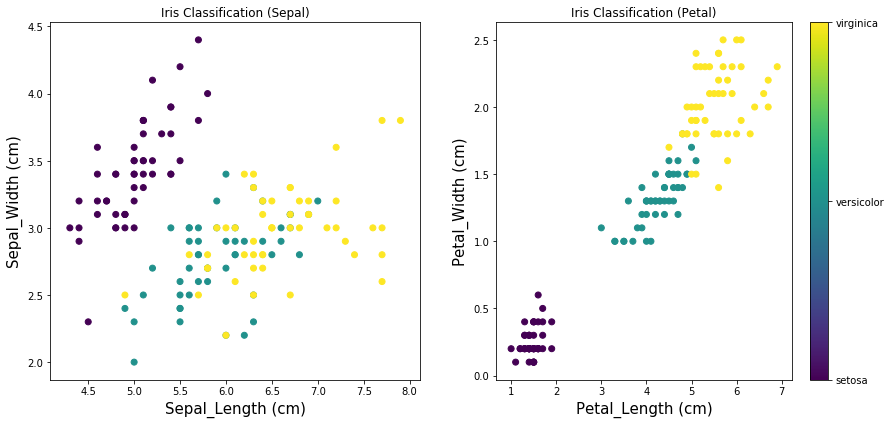

In [3]:
def plot_scatter_iris(df):
    
    labels =[]
    labels_names=['setosa','versicolor','virginica']
    for label in df.Class:
        l=label.split('-')
        if(l[1].rstrip() == 'setosa'):
            labels.append(0)
        elif(l[1].rstrip() == 'versicolor'):
            labels.append(1)
        else :
            labels.append(2)
        
    formatter = plt.FuncFormatter(lambda i, *args: labels_names[int(i)])
    fig= plt.figure(figsize=(13, 6))
    plt.subplots_adjust(wspace=5)
    sepal_plt = fig.add_subplot(1,2,1)
    plt.scatter(df.Sepal_Length, df.Sepal_Width, c=labels)
    sepal_plt.set_xlabel(df.columns[0]+ ' (cm)',fontsize=15)
    sepal_plt.set_ylabel(df.columns[1] + ' (cm)',fontsize=15)
    sepal_plt.title.set_text('Iris Classification (Sepal)')
    
    petal_plt = fig.add_subplot(1,2,2)
    plt.scatter(df.Petal_Length, df.Petal_Width, c=labels)
    petal_plt.set_xlabel(df.columns[2]+ ' (cm)',fontsize=15)
    petal_plt.set_ylabel(df.columns[3] + ' (cm)',fontsize=15)
    petal_plt.title.set_text('Iris Classification (Petal)')
    
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    fig.tight_layout()
    return fig

result_figure = plot_scatter_iris(df)
result_figure.savefig("results/iris.png", bbox_inches="tight")
plt.show()

## Implementation
----


In [4]:
## Import libraries
import numpy as np
import pandas as pd
import operator
from random import randrange
import random
from statistics import mode
from matplotlib import pyplot as plt

In [5]:
## Compute Euclidean Distance

def Euclidean_Distance(x, y):
    
    d = 0
    for i in range(len(x)):
        d += np.square(x[i] - y[i])
    return np.sqrt(d)

In [6]:
## load iris dataset

df = pd.read_csv("iris.csv")
#print(df.head)

In [7]:
## Function For spliting data into two parts Test and Train
'''
A default split percentage of 0.7 or 70% is used. This will assign 70% of the dataset to the training dataset 
and leave the remaining 30% to the test dataset. 
'''
def train_test_split(df, split=0.70):
    train = pd.DataFrame(columns = df.columns)
    train_size = int(split * len(df))
    test_data = df
    index = np.array(random.sample(range(0, len(test_data)),train_size))
    i=0
    while len(train) < train_size:
        train = train.append(test_data.loc[index[i]])
        test_data = test_data.drop(index[i])
        i += 1
    return train, test_data

In [8]:
## KNN Function

def knn_classifier(train,test,k):
    distances = {} #dictionary to store distances per row or per datapoint
    for i in range(len(train)):
        distances[i] = Euclidean_Distance(test,train.iloc[i])
        #print(distances[i])
    
    sorted_distances = sorted(distances.items(),key = operator.itemgetter(1))
    
    label = [train.iloc[sorted_distances[i][0]][-1] for i in range(k)]
    #print(label)
    #expected_ouput = mode(label)
    
    modein = {}
    for i in range(len(label)):
        if label[i] in modein:
            modein[label[i]] += 1
        else : 
            modein[label[i]] = 1
            
    #print(modein)
    expected = sorted(modein.items(),key = operator.itemgetter(1),reverse=True)
    return(np.asarray(expected)[0][0])

In [9]:
## Choosing k
def choosing(k):
    ks = np.array(random.sample(range(1,k),int(k/2)))
    return ks


In [12]:
train,test_set = train_test_split(df)
epochs = 0
ks = choosing(20)
print(" Experimenting with Set of K different values",ks)
Accuracies = []
test_loss = []
for k in ks:
    positive = 0
    epoch = 0
    for test in test_set.values.tolist():
        result = knn_classifier(train,np.array(test[:-1]).flatten(),k)
        if(result.strip() == test[-1].strip()):
            positive +=1
        else :
            test_loss.append(test)
        epoch += 1
    print("Accuracy (K = ",k,') :',positive/epoch)
    Accuracies.append(positive/epoch)
    epochs += 1

 Experimenting with Set of K different values [12 15  1 10 18 17  8 16 13  3]
Accuracy (K =  12 ) : 0.9555555555555556
Accuracy (K =  15 ) : 0.9555555555555556
Accuracy (K =  1 ) : 0.9555555555555556
Accuracy (K =  10 ) : 0.9777777777777777
Accuracy (K =  18 ) : 0.9555555555555556
Accuracy (K =  17 ) : 0.9333333333333333
Accuracy (K =  8 ) : 0.9555555555555556
Accuracy (K =  16 ) : 0.9777777777777777
Accuracy (K =  13 ) : 0.9555555555555556
Accuracy (K =  3 ) : 0.9555555555555556
